<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/GapMinder1.PNG" alt="drawing" width="200">

Notas realizadas en el curso de edX Data Science: visualization, impartido por el profesor Rafael Irizarry de la Universidad de Harvard. Este notebook revisa una base de datos creada por Gapminder, la cual es una organización sin fines de lucro que tiene el objetivo de corregir algunos prejuicios que tiene la gente sobre el mundo a traves de datos confiables. Esta base de datos en particular almacena indicadores económinos y de desarrollo de los paises del mundo para diferentes años. 

## Base de datos

Se cargan las librerías necesarias para el ejemplo.

In [4]:
library(dslabs)
library(dplyr)
library(tidyverse)
library(ggplot2)

Se carga la base de datos de Gapminder, como se puede observar, contiene datos sobre mortalidad infantil, fertilidad, PIB, además de que agrupa a los países por regiones y continentes.

In [5]:
data("gapminder")
head(gapminder)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
4,Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
6,Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


## Esperanza de vida

Se fija una tema de gráficas específico y se gráfica la esperanza de vida agrupándo los datos por continentes, para contrastar los datos, se grafican los datos referentes a los años 1962 y 2012. Se observa que la esperanza de vida ha crecido de manera generalizada. Mientras que en el año de 1962 solo los países de occidente (Europa y América del Norte) tenían una esperanza de vida alta, en la actualidad la gente de los paises latinoaméricanos y asiaticos están presentado esperanzas de vida muy similares.

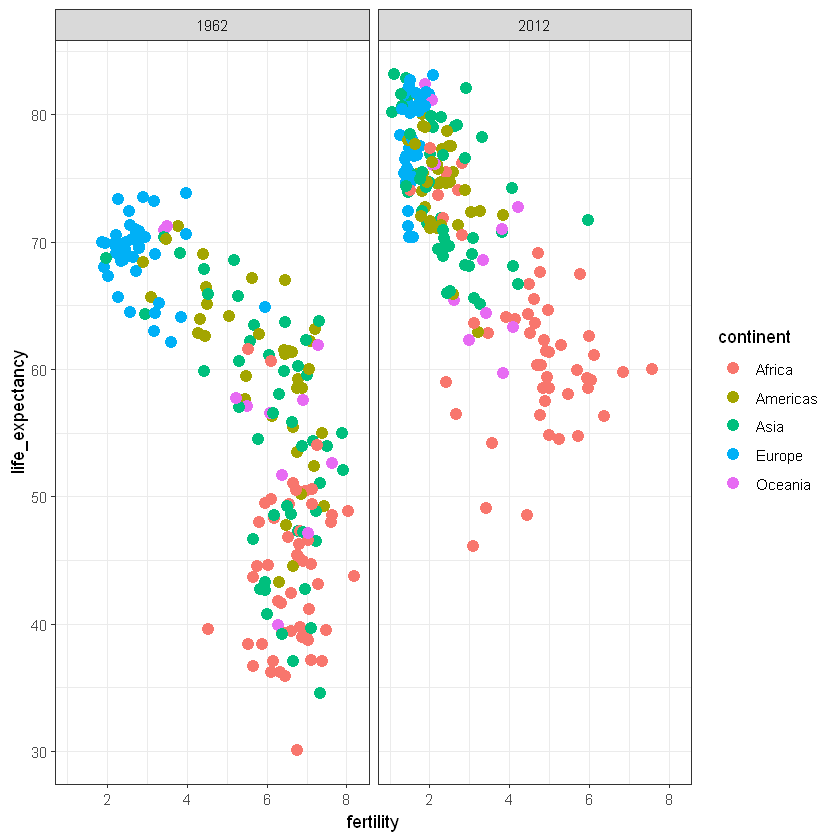

In [9]:
ds_theme_set()
filter(gapminder,year %in% c(1962,2012))%>%ggplot(aes(fertility,life_expectancy,color=continent))+
  geom_point(size=3)+facet_grid(.~year)

En la siguiente gráfica se muestra una comparación entre los países europeos y asiáticos a traves del tiempo. La gráfica muestra de una manera muy amigable como ambas esperanzas de vida han convergido en los últimos 50 años.

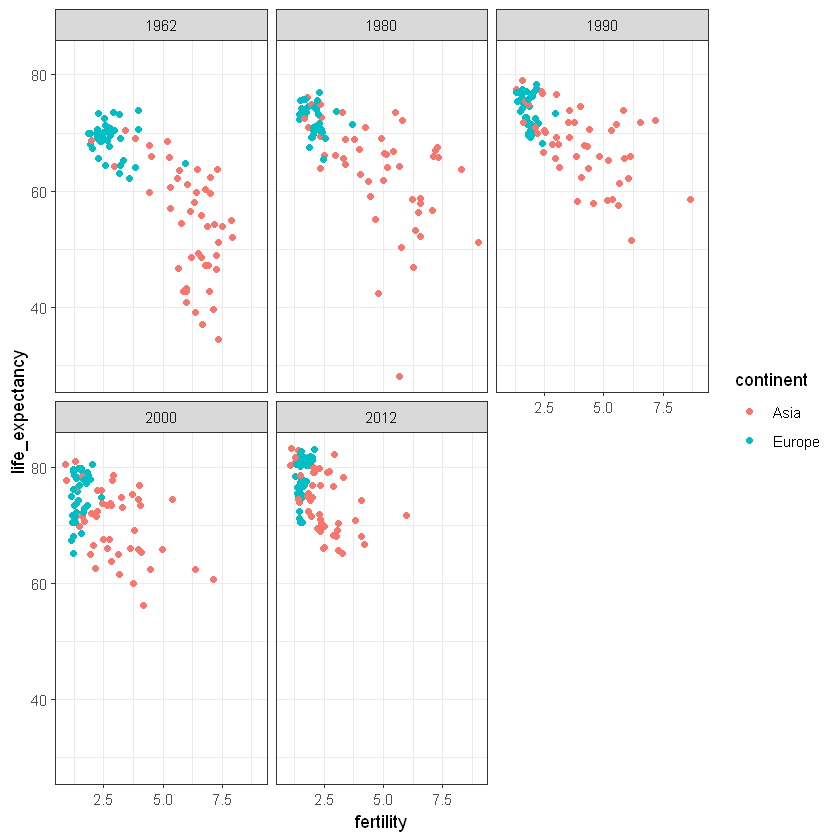

In [10]:
years<- c(1962,1980,1990,2000,2012)
continents<-c("Europe", "Asia")

gapminder %>% 
  filter(year %in% years & continent %in% continents) %>% 
  ggplot(aes(fertility,life_expectancy,col=continent))+
  geom_point() +
  facet_wrap(~year)

Ahora comparamos la esperanza de vida de dos países: Alemania y Corea del Sur. Al principio de la serie del tiempo se veía que los alemanes vivían aproximadamente 15 años más que los sudcoreanos, ahora ambas esperanzas de vida son prácticamente identicas.

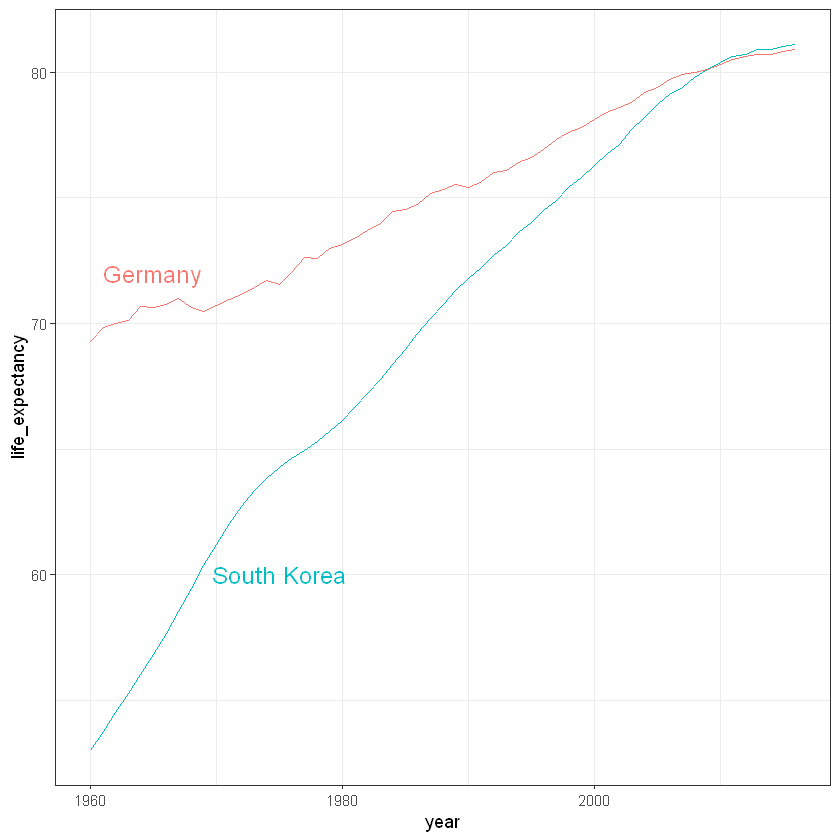

In [12]:
paises=c("South Korea","Germany")
etiquetas=data.frame(country=paises,x=c(1975,1965),y=c(60,72))

gapminder %>%
  filter(country %in% paises) %>%
  ggplot(aes(year,life_expectancy,col=country))+
  geom_line()+
  geom_text(data=etiquetas,aes(x,y,label=country),size=5)+
  theme(legend.position = "none")

## Economía

En la siguiente gráfica se compara el PIB a través de los años de tres países: México, España y Francia.

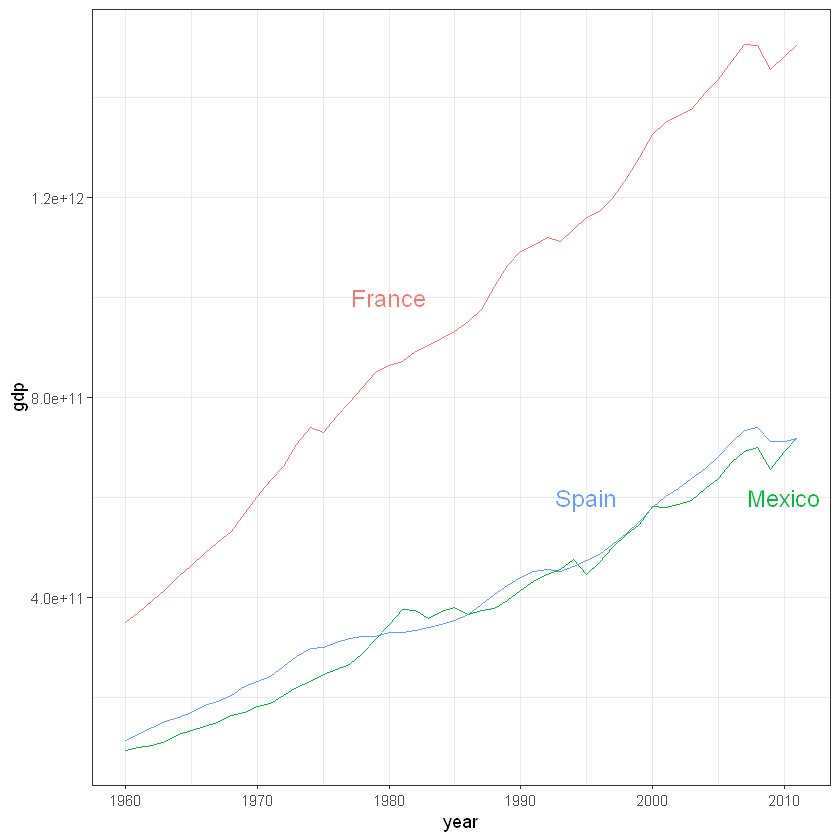

In [13]:
paises=c("Mexico","Spain","France")
etiquetas=data.frame(country=paises,x=c(2010,1995,1980),y=c(6e+11,6e+11,1e+12))

gapminder %>%
  filter(country %in% paises & !is.na(gdp)) %>%
  ggplot(aes(year,gdp,col=country))+
  geom_line()+
  geom_text(data=etiquetas,aes(x,y,label=country),size=5)+
  theme(legend.position = "none")

Para estudiar el progreso económico, tenemos que definir un criterio sobre pobreza. Se considera que cuando una persona gana menos de 2 dls por día, vive en pobreza. Para estimar el nivel de vida de las personas lo que se hará es dividir el PIB entre la población. En la siguiente gráfica se presenta el histograma de poblaciones, el eje X se encuentra en escala logarítmica.

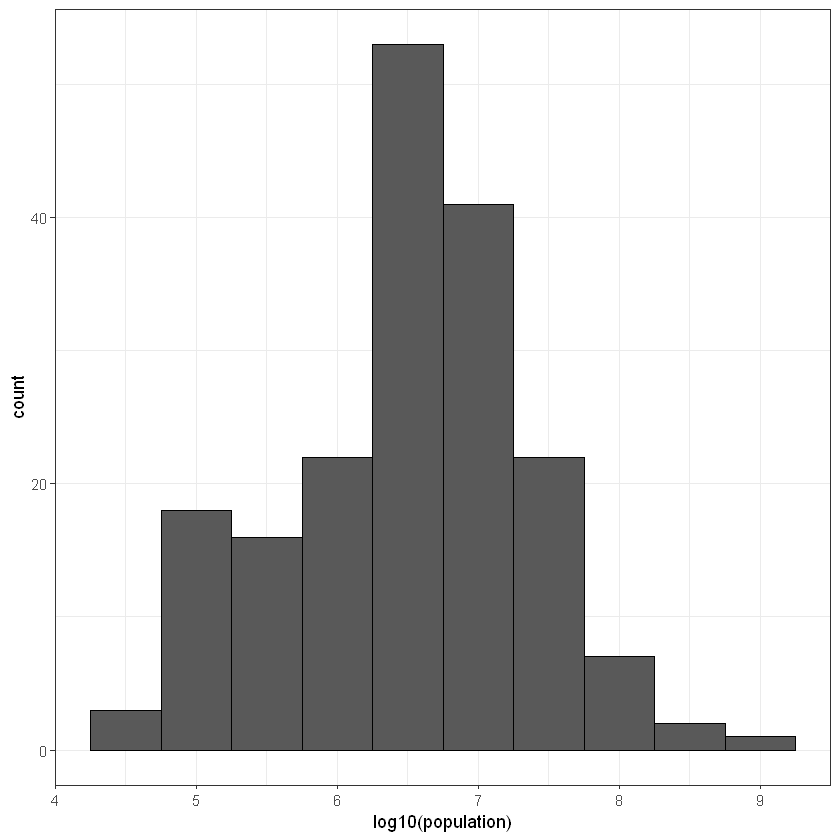

In [14]:
past_year=1970
gapminder %>%
  filter(year==past_year & !is.na(population)) %>%
  ggplot(aes(log10(population)))+
  geom_histogram(binwidth = 0.5, color="black")

Ahora modificamos el data frame agregándo una nueva columna con ingreso diario en dls. Se considera que un ingreso por debajo de 2 dls/día significa vivir en estado de pobreza. Posteriormente se grafica el histograma de la variable. En esta forma de la gráfica tenemos que deshacer la conversión a escala logarítmica del eje X para leerla, esto no resulta muy conveniente para la interpretación directa de los datos.

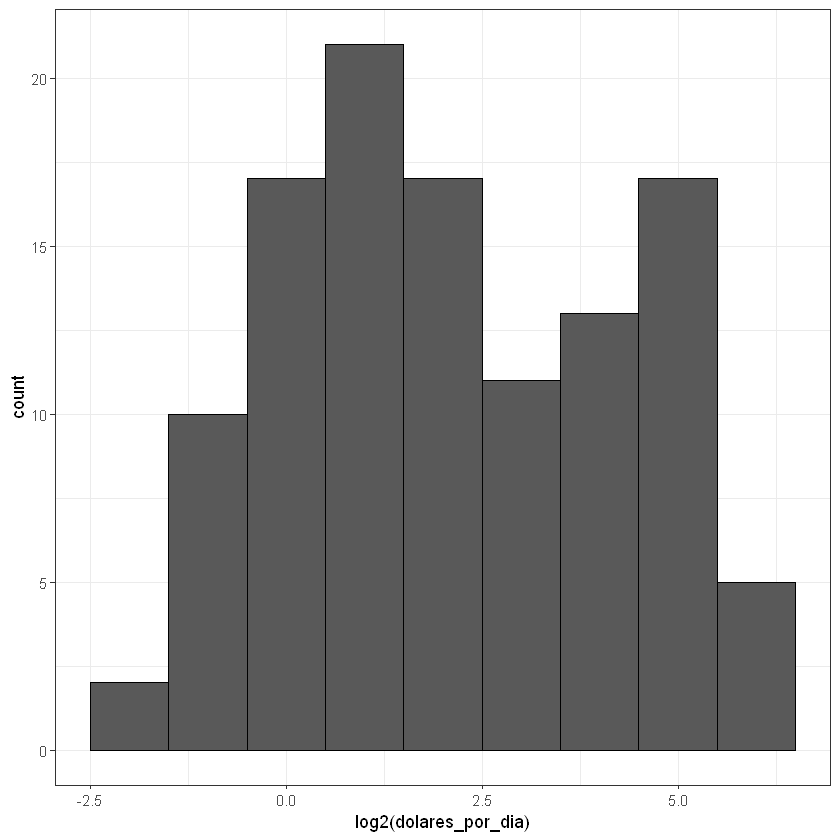

In [35]:
gapminder=gapminder %>% mutate(dolares_por_dia=gdp/population/365)

gapminder %>% filter(year==past_year & !is.na(gdp)) %>%
  ggplot(aes(log2(dolares_por_dia)))+
  geom_histogram(binwidth = 1, color="black")

Para solucionar ese inconveniente, en esta otra gráfica la escala está en logarítmos pero las etiquetas del eje X no se encuentran convertidos. Observamos que, para el año de 1970, los ingresos tenían mayor frecuencia en valores cera de 2 dls por día y 64 dls por día. Debido a ésto, la gráfica es bimodal. La concentración de ingresos en dos zonas corresponde a un mundo desigual con una gran separación entre los ingresos de los países ricos y pobres. 

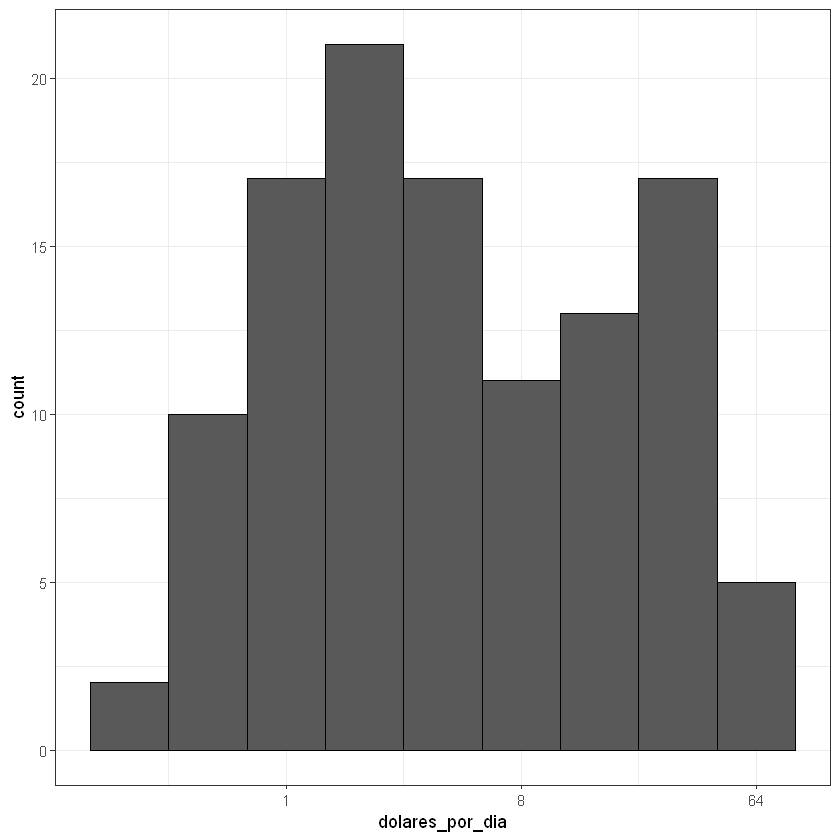

In [17]:
gapminder %>% filter(year==past_year & !is.na(gdp)) %>%
  ggplot(aes(dolares_por_dia))+
  geom_histogram(binwidth = 1, color="black")+
  scale_x_continuous(trans = "log2")

Para desglosar más la información, se grafica diagramas de cajas y bigotes. Los datos se agrupan por continentes y regiones, además se ordenan por el valor de sus medianas de manera crecientes. Para el año de 1970 los países más ricos eran los europeos mientras que los más pobres eran los africanos y sudasiáticos.

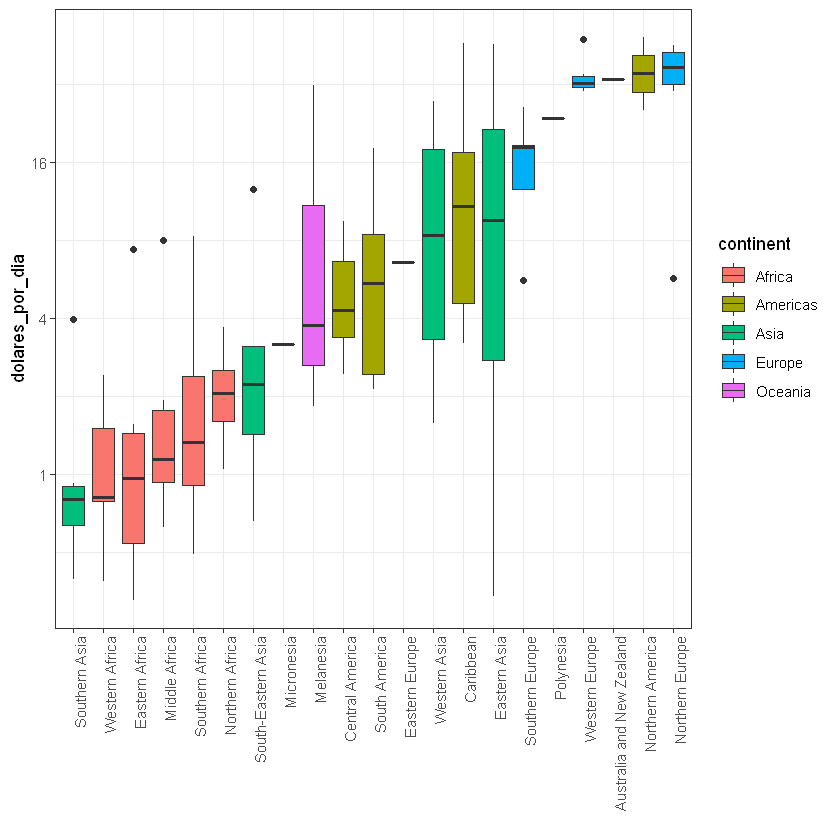

In [18]:
p=gapminder %>%
  filter(year==past_year & !is.na(gdp)) %>%
  mutate(region=reorder(region, dolares_por_dia, FUN=median)) %>%
  ggplot(aes(region,dolares_por_dia,fill=continent))+
  geom_boxplot()+
  theme(axis.text.x=element_text(angle=90, hjust=1))+
  xlab("")+
  scale_y_continuous(trans = "log2")
p

Ahora se hace una comparación entre los países occidentales y el resto del mundo para el año 1970. En la gráfica se observa nuevamente la ya mencionada bimodalidad de los ingresos por día, siendo notorio que los países de occidente concentraban los mayores ingresos per capita.

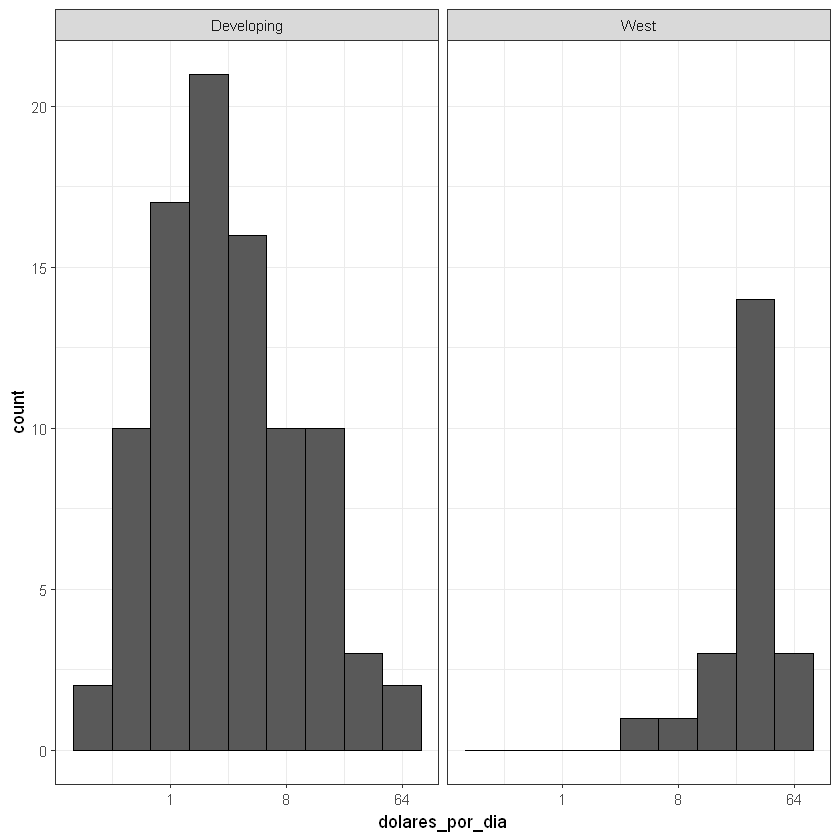

In [19]:
# Comparación entre West y Develping
west = c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

# Solo año pasado
gapminder %>%
  filter(year==past_year & !is.na(gdp)) %>%
  mutate(group=ifelse(region %in% west, "West", "Developing")) %>%
  ggplot(aes(dolares_por_dia))+
  geom_histogram(binwidth=1, color="black")+
  scale_x_continuous(trans="log2")+
  facet_grid(.~group)

En la siguiente gráfica se muestra una comparación nuevamente entre los países de occidente y el resto del mundo, pero ahora para los años 1970 y 2010. Se observa que el ingreso promedio de los paíases en vías de desarrollo se ha visto incrementado en los últimos 40 años, pasando de 2 dls por día a casi 8 dls por día (a números gordos). Incluso se observa un incremento de los casos en que los países no accidentales tienen ingresos cercanos a 6 dls por día.

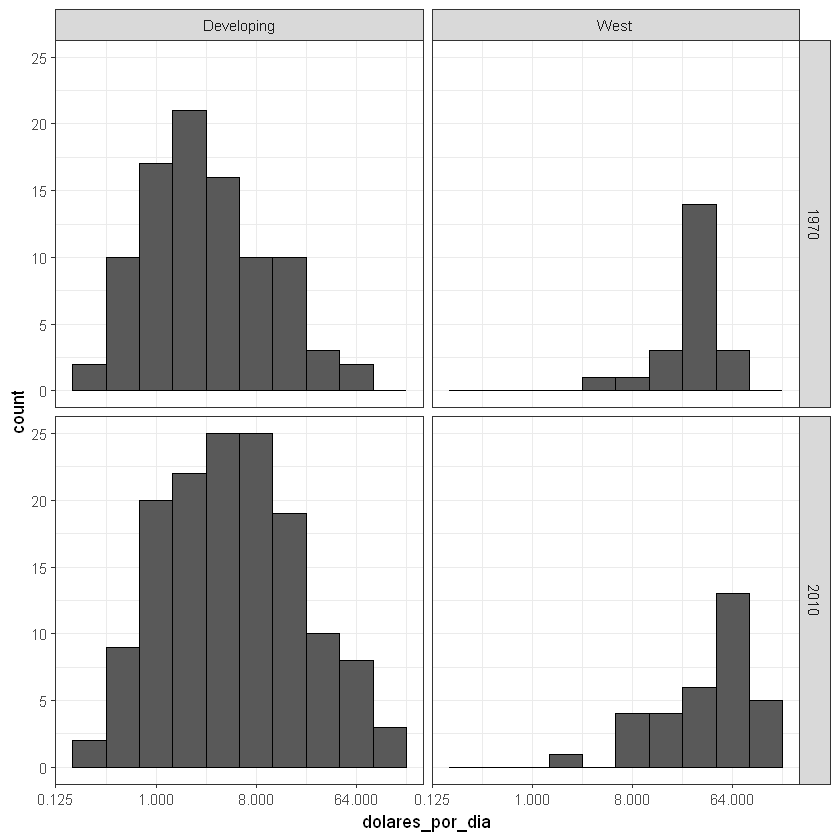

In [20]:
present_year=2010

# Considerando año presente
gapminder %>% 
  filter(year %in% c(past_year,present_year) & !is.na(gdp)) %>%
  mutate(group=ifelse(region %in% west, "West", "Developing")) %>%
  ggplot(aes(dolares_por_dia))+
  geom_histogram(binwidth = 1, color="black")+
  scale_x_continuous(trans = "log2")+
  facet_grid(year~group)

Se hace una ligera modificación a la gráfica, ahora solo se consideran los países que existían en 1970 para elaborar los histogramas.

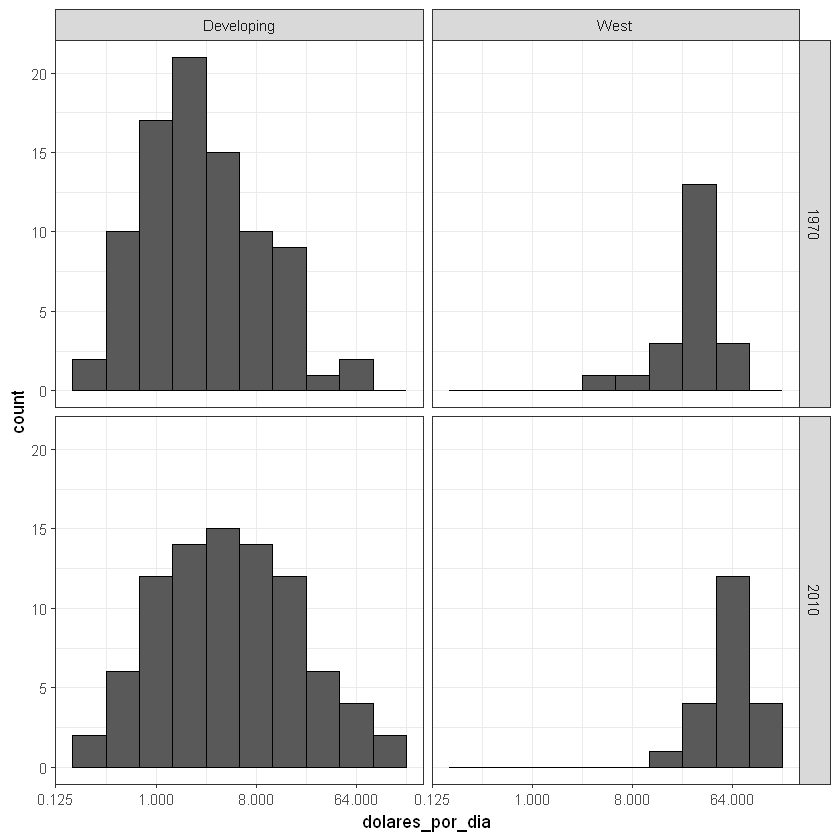

In [21]:
# Ahora solo consideramos los paises que existen desde 1970
country_list1= gapminder %>%
  filter(year==past_year & !is.na(gdp)) %>% .$country
country_list2= gapminder %>%
  filter(year==present_year & !is.na(gdp)) %>% .$country
country_list=intersect(country_list1,country_list2)

gapminder %>%
  filter(year %in% c(past_year,present_year) & country %in% country_list & !is.na(gdp)) %>%
  mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
  ggplot(aes(dolares_por_dia))+
  geom_histogram(binwidth = 1, color="black")+
  scale_x_continuous(trans="log2")+
  facet_grid(year~group)

Se desglosan los datos por medio de diagramas de cajas y bigotes. Los datos se agrupan por regiones y continentes, además se ordenan los diagramas por orden creciente de sus medianas. Se observa que la región del este asiático ha visto incrementarse su ingreso diario de manera considerable (de 8 dls/día a 64 dls/día).

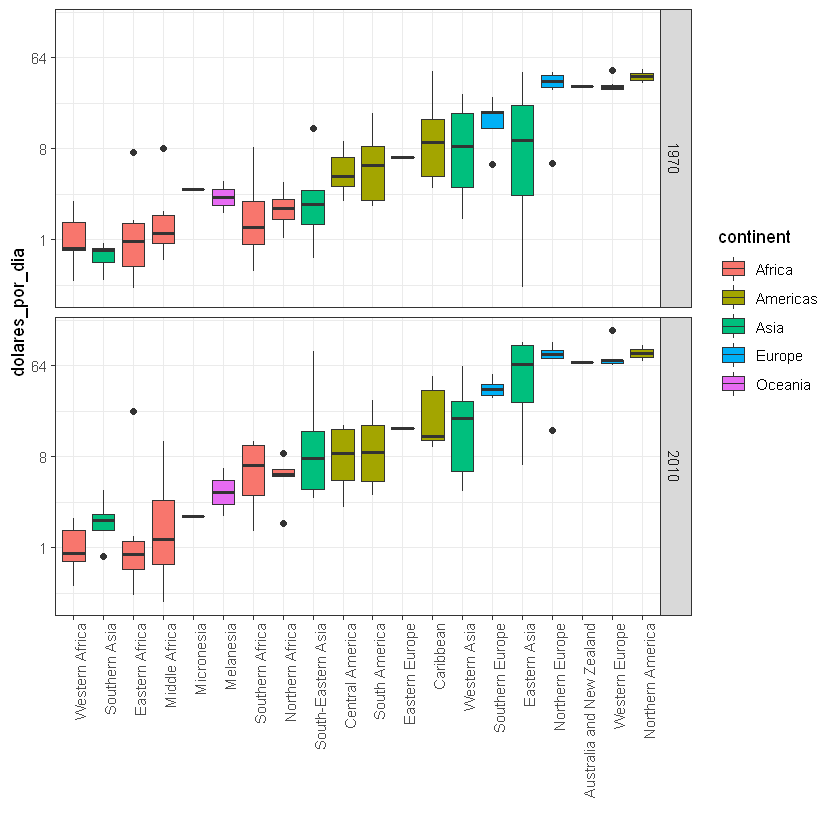

In [23]:
# Se comparan con diagramas de cajas
p=gapminder %>%
  filter(year %in% c(past_year,present_year) & country %in% country_list & !is.na(gdp)) %>%
  mutate(region = reorder(region, dolares_por_dia, FUN = median)) %>%
  ggplot()+
  theme(axis.text.x = element_text(angle = 90, hjust=1))+
  xlab("") + scale_y_continuous(trans="log2")

# Se grafican separadas
p + geom_boxplot(aes(region,dolares_por_dia, fill=continent))+
  facet_grid(year ~ .)

Para facilitar la comparación, ahora los diagramas se dibujan juntos uno a lado del otro. Se observa que en los últimos 40 años, la mayoría de las regiones del mundo han visto incrementarse su ingreso per capita.

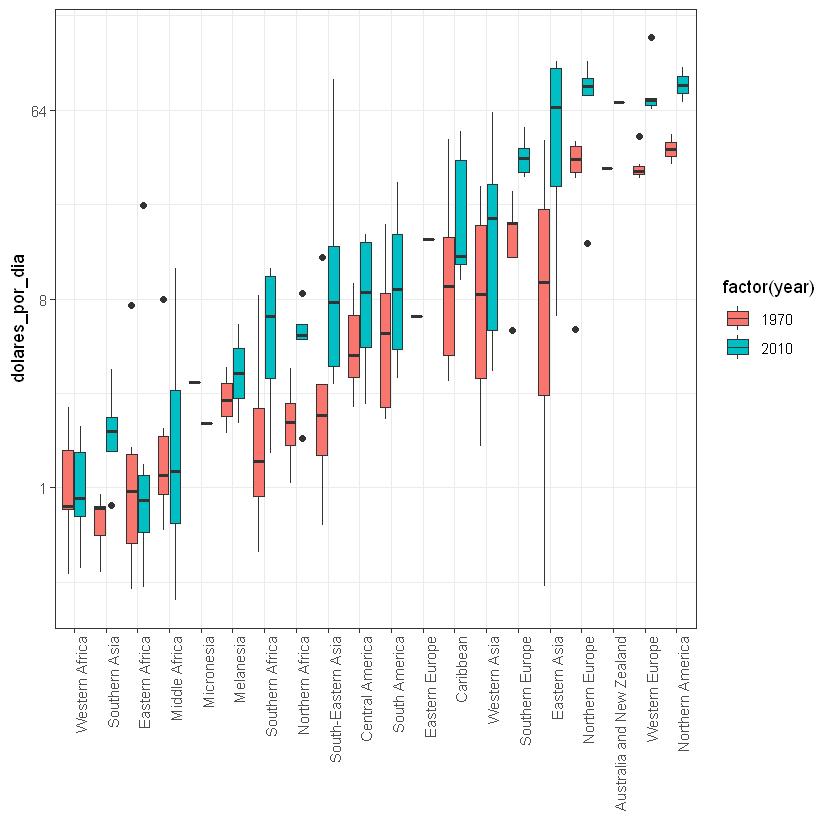

In [24]:
# Se grafican juntas
p + geom_boxplot((aes(region,dolares_por_dia,fill=factor(year))))

Ahora se grafican las curvas de densidad agrupando los países entre occidente y resto del mundo.

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.



Group,n
<chr>,<kntr_kbl>
Developing,| x|
Developing,|--:|
Developing,| 87|
West,| x|
West,|--:|
West,| 21|


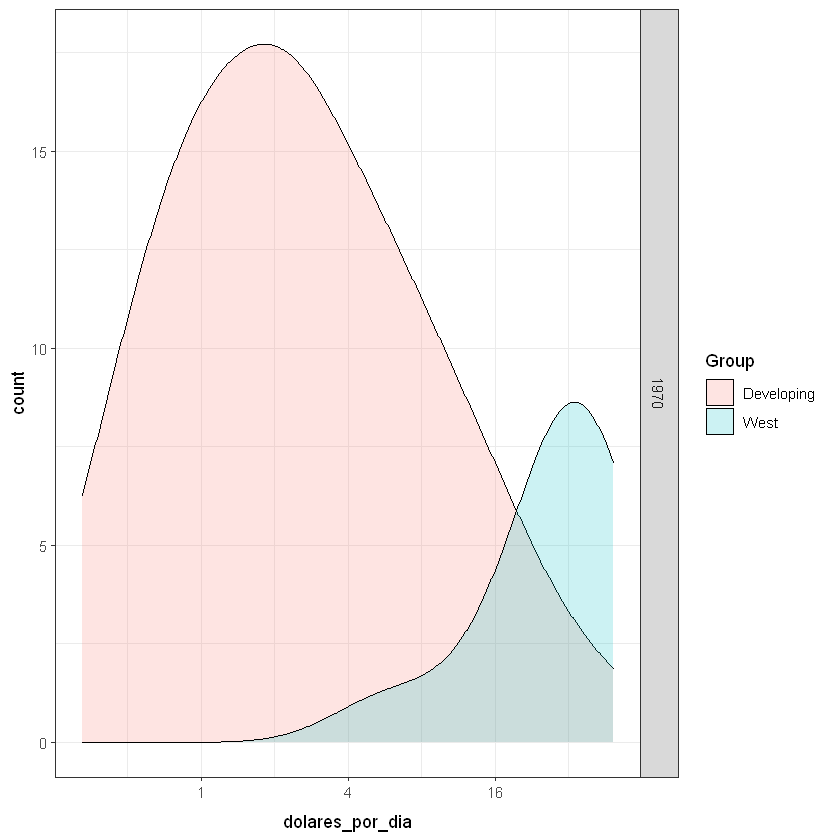

In [25]:
gapminder %>% 
  filter(year==past_year & country %in% country_list) %>%
  mutate(Group=ifelse(region %in% west, "West", "Developing")) %>%
  group_by(Group) %>%
  summarize(n=n() %>% knitr::kable())

p=gapminder %>%
  filter(year==past_year & country %in% country_list) %>%
  mutate(Group=ifelse(region %in% west, "West", "Developing")) %>%
  ggplot(aes(dolares_por_dia, y=..count..,fill=Group))+
  scale_x_continuous(trans="log2")

p+geom_density(alpha=0.2, bw=0.75)+facet_grid(year~ .)

Se hace algo similar en las siguientes gráficas pero agrupando por otro tipo de regiones.

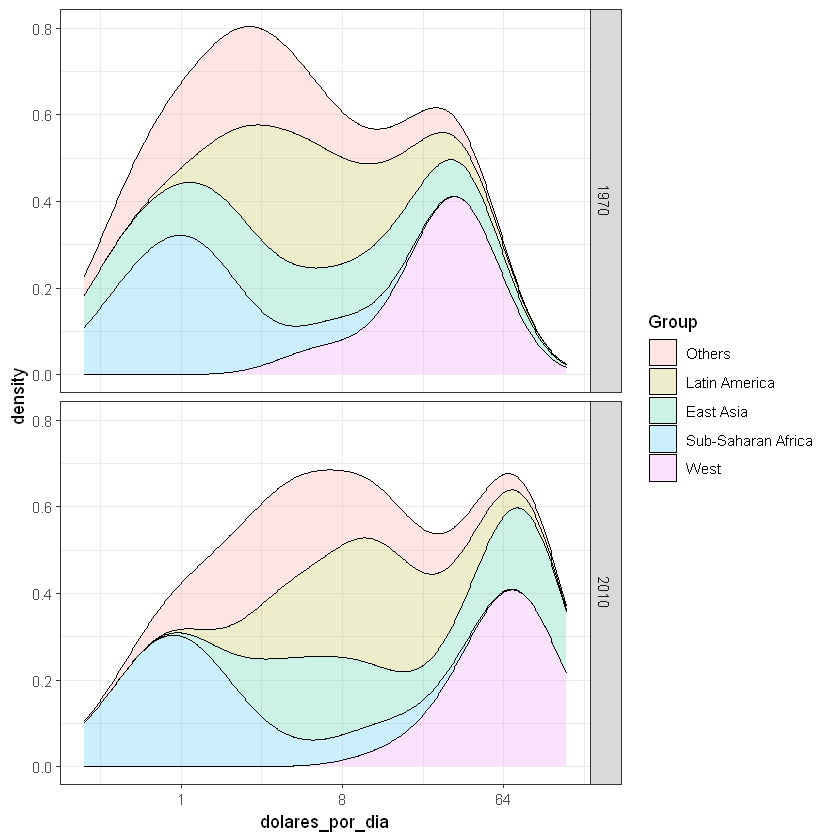

In [26]:
gapminder = gapminder %>%
  mutate(Group=case_when(
    .$region %in% west ~ "West",
    .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
    .$region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
    .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
    TRUE ~ "Others"))

# Orden en que aparece la leyenda
gapminder = gapminder %>%
  mutate(Group=factor(Group,levels = c("Others","Latin America", "East Asia", "Sub-Saharan Africa", "West")))
  
# Base de la gráfica
p=gapminder %>%
  filter(year %in% c(past_year,present_year) & country %in% country_list) %>%
  ggplot(aes(dolares_por_dia, fill=Group))+
  scale_x_continuous(trans = "log2")

# Tipo de gráfica
p+geom_density(alpha=0.2, bw=0.75, position = "stack")+
  facet_grid(year~ .)

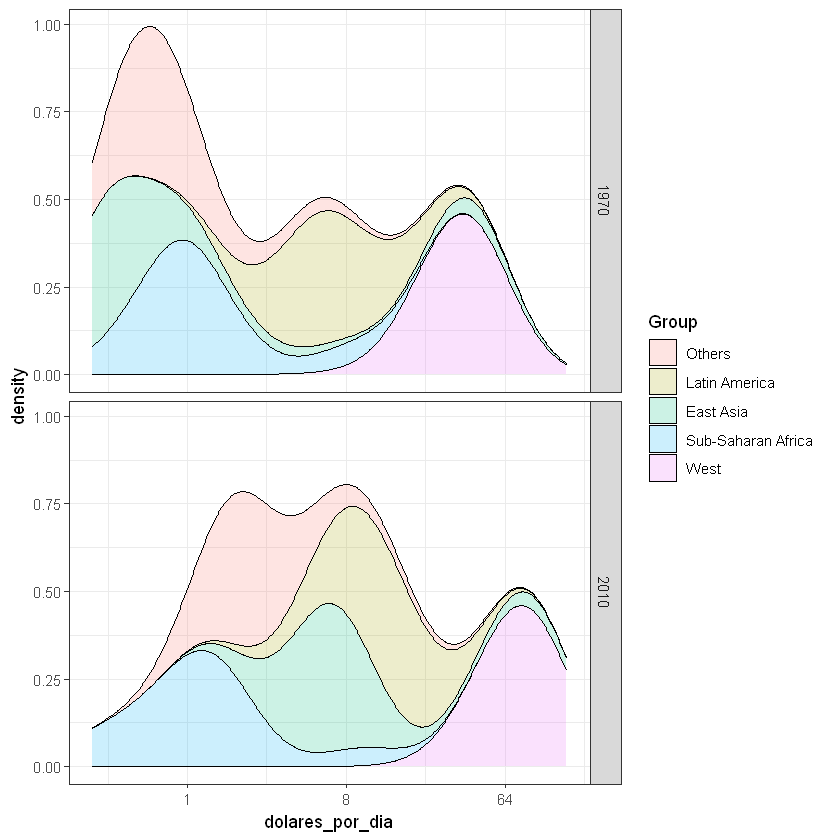

In [27]:
gapminder %>%
  filter(year %in% c(past_year,present_year) & country %in% country_list) %>%
  group_by(year) %>%
  mutate(weight=population/sum(population*2)) %>%
  ungroup() %>%
  ggplot(aes(dolares_por_dia, fill=Group, weight=weight))+
  scale_x_continuous(trans="log2")+
  geom_density(alpha=0.2, bw=0.75, position="stack")+
  facet_grid(year~ .)

## Mortalidad infantil

Ahora se utilizarán los datos de la mortalidad infantil para presentar el concepto de "falacia ecologica", el cual hace referencia a que es posible asumir que las conclusiones hechas con la media de los grupos aplican a todos los miembros de ese grupo. Primer se vuelve a cargar la base de datos y se agrupan los países por determinadas regiones.

In [36]:
data(gapminder)

gapminder = gapminder %>%
  mutate(group = case_when(
    .$region %in% west ~ "The West",
    .$region %in% "Northern Africa" ~ "Northern Africa",
    .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
    .$region == "Southern Asia" ~ "Southern Asia",
    .$region %in% c("Central America", "South America", "Caribbean") ~ "Latin America",
    .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
    .$region %in% c("Melanesia", "Micronesia", "Polynesia") ~ "Pacific Islands"))

Posteriormente se define un data frame con el valor medio de la tasa de supervivencia infantil para los grupos antes creados.

In [37]:
surv_income = gapminder %>%
  filter(year %in% present_year & !is.na(gdp) & !is.na(infant_mortality) & !is.na(group)) %>%
  group_by(group) %>%
  summarize(income = sum(gdp)/sum(population)/365,
            infant_survival_rate = 1 - sum(infant_mortality/1000*population)/sum(population))
surv_income %>% arrange(income)

group,income,infant_survival_rate
<chr>,<dbl>,<dbl>
Sub-Saharan Africa,1.759299,0.9358607
Southern Asia,2.070296,0.9521295
Pacific Islands,2.704745,0.9560088
Northern Africa,4.942935,0.9703514
Latin America,13.244228,0.9831732
East Asia,13.439078,0.9848303
The West,77.065524,0.9951445


Los valores de la mortalidad infantil media son graficados. Se observa que la gráfica indica que occidente presenta tasas de supervivencia de infantes mucho mayores que el resto del grupo.

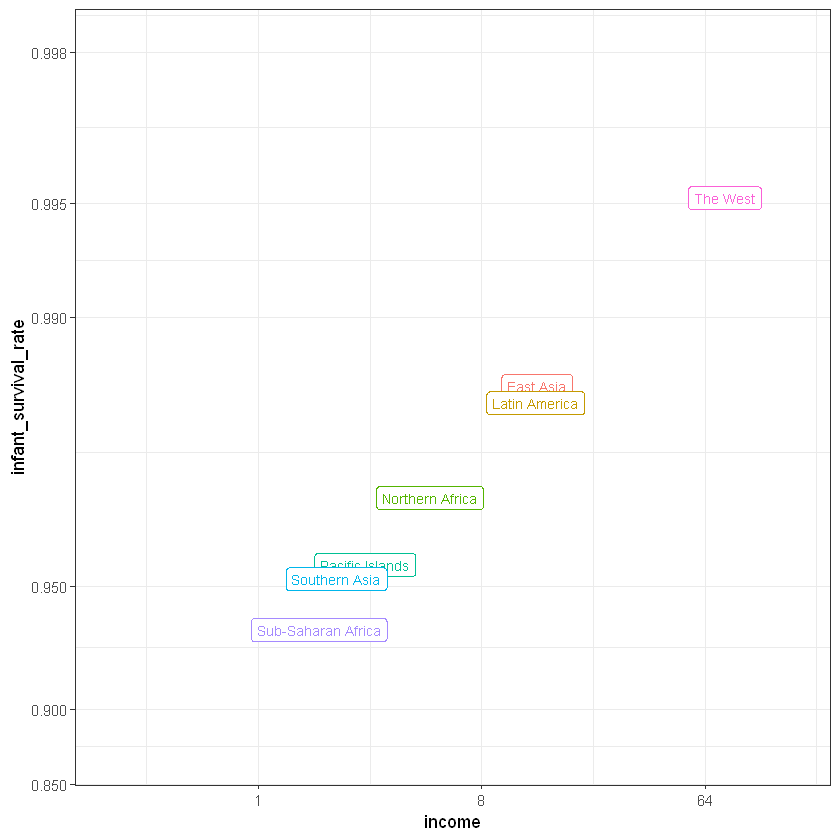

In [31]:
surv_income %>% ggplot(aes(income, infant_survival_rate, label = group, color = group)) +
  scale_x_continuous(trans = "log2", limit = c(0.25, 150)) +
  scale_y_continuous(trans = "logit", limit = c(0.875, .9981),
                     breaks = c(.85, .90, .95, .99, .995, .998)) +
  geom_label(size = 3, show.legend = FALSE)

La gráfica anterior muestra que los países de África presentan tasas de supervivencia muy bajas, sin mebargo, al desglosar los datos por nuevas regiones del continente, se observa que existe una gran variabilidad de este parámetro dentro del mismo continente.

Warning message:
"Removed 3 rows containing missing values (geom_point)."
Warning message:
"Removed 3 rows containing missing values (geom_text)."


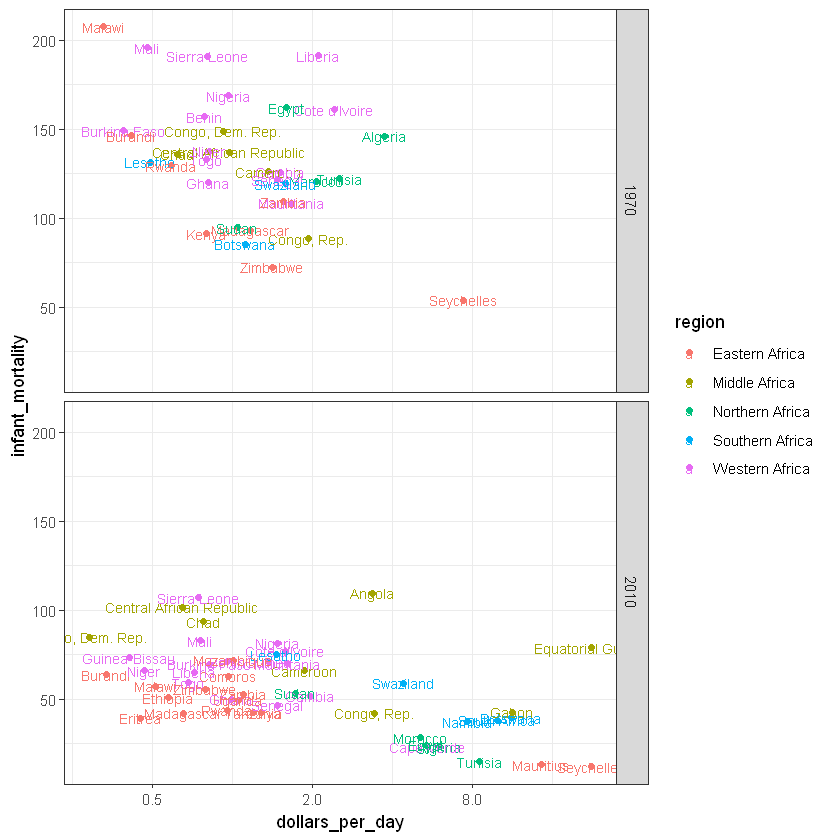

In [34]:
p=gapminder %>% filter(year %in% c(1970,2010) & continent=="Africa" & !is.na(gdp)) %>% 
  mutate(dollars_per_day=gdp/population/365) %>% 
  ggplot(aes(dollars_per_day,infant_mortality,color=region,label=country))+
  geom_point()+scale_x_continuous(trans="log2")+
  geom_text(size=3)+facet_grid(year~.)
p